# GANs (Generative Adversarial Networks)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="h.png">

### 정보 엔트로피Information Entropy
<hr/>
<div style="line-height:30px;font-size:15px;">
어떤 확률변수 $X$와 확률분포 $P(X=x)$가 있을 때 '확률 분포에 담긴 불확실성의 한 척도'의 개념으로 엔트로피를 사용합니다. 그 확률 분포를 따르는 확률변수의 값을 예측하기 위해 고려해야할 사항이 많다면, 즉, 불확실성이 크다면 엔트로피는 큰것입니다. 시스템의 질서가 너무 잘 잡혀 있어서 쉽게 예측 가능하다면 무질서도가 낮아 엔트로피가 낮은 것입니다. 정보이론에서 이를 어떻게 정의하는지 실례를 들어 간단하게 알아보도록 하겠습니다. 
아래 내용은 <a href="https://ko.khanacademy.org/computing/computer-science/informationtheory/moderninfotheory/v/information-entropy">칸아카데미 정보엔트로피 강의</a> [1]를 참고하여 작성하였습니다. 
<br/>
어떤 시스템이 1, 2, 3, 4를 출력하는데 숫자 4개가 아래 그림처럼 배치되어 있고, 한번에 해당 숫자에 불 들어온다고 합시다. 1000번정도 시행해 봤더니 1, 2, 3, 4 모두 딱 250번씩 출력했다고 가정합니다. 이 시스템은 1, 2, 3, 4 라는 실수값에 함수값 0.25를 할당하는 확률질량함수 $P(X)$를 확률 분포로 가지는 이산확률변수 $X$ 라고 할수 있습니다.  1001번째 숫자가 출력 되었을 때 이 숫자가 무엇인지 알아내기 위해 우리는 어떤 것을 고려해야 할까요? 다시 말해 어떤 질문들을 던져야 할까요? 가장 쉽게는 1인가요? 2인가요? 3인가요? 라고 3번 묻는다면 그중 한번은 정답을 줄것입니다. 운이 좋다면 한번에 맞추고 운이 나쁘다면 3번이나 질문을 해야 합니다. 하지만 시스템은 정확히 동일한 확률로 숫자를 출력하므로 이렇게 물어 볼 수 있습니다. 
<br/>
<img src="1.png" width="200">
<b>
[1] 지금 출력된 숫자가 위쪽 두개인가요?<br/>
[2] 왼쪽에 있는 숫자인가요?
</b>
<br/><br/>
예를 들어 출력된 숫자가 1이라고 하면 1번 질문에 예라고 대답할 것이고, 이어서 2번 질문에 예라고 답할 것이므로 우리는 1번이 출력되었음을 알 수 있습니다. 4를 출력했다면 1번 질문에 아니오, 2번 질문에 아니오라고 대답할 것이므로 역시 4번이 출력되었음을 알 수 있습니다. 즉, 위와 같이 질문을 하면 1, 2, 3, 4 모든 숫자에 대해 질문 2번만에 현재 출력된 숫자를 정확히 예측할 수 있습니다. 또는 질문을 "[1] 1 또는 2 입니까?" [1]에 대해서 예라면 "[2] 1입니까?" 아니오라면 "[2] 3입니까?"로 하여도 결과는 동일합니다. 
<br/>
<img src="2.png" width="450">
<br/><br/>
질문과 결정을 트리 형태로 표현하면 위와 같이 표현할 수 있습니다. 1001번째 나온 숫자가 1인지 알아내는데 필요한 질문수 2개, 2인지 알아내는데 필요한 질문수 2개, 숫자 3, 4 역시 질문수 2개가 필요합니다. 그래서 평균을 내면 숫자를 예측하는데 2번의 질문이 필요함을 알 수 있습니다. 이를 각 숫자에 해당하는 질문수를 $q_i$ 라 두고 식으로 써보면 평균질문수 또는 질문수의 기대값은 다음과 같습니다.
<br/><br/>
$$
\begin{align}
\mathbb{E}(q)
&= \frac{250 \times q_{1} + 250 \times q_{2} +250 \times q_{3}+250 \times q_{4}}{1000} \\[3pt]
&= \frac{250}{1000}q_{1}+\frac{250}{1000}q_{2}+\frac{250}{1000}q_{3}+\frac{250}{1000}q_{4}
\end{align}
$$
<br/>
입니다. 여기에서 $\frac{250}{1000}$은 각 숫자의 확률이 되므로 다시 쓰면
<br/><br/>
$$
\mathbb{E}(q) = P(X=1)q_{1}+P(X=2)q_{2}+P(X=3)q_{3}+P(X=4)q_{4}
$$
<br/>
입니다. 여기에서 질문수 $q_{i}$는 위 이진트리에서 얼마나 깊이 내려 갔는가와 일치 합니다. 이진 트리에서 깊이는 $\log_{2}(\text{#node})$ 이므로 
다시 쓰면<br/><br/>
$$
\begin{align}
\mathbb{E}(q) 
&= P(X=1)\log_{2}4+P(X=2)\log_{2}4+P(X=3)\log_{2}4+P(X=4)\log_{2}4 \\[3pt]
&= \sum_{i=1}^{4} P(X=x_{i})\log_{2}4 \\[3pt]
&= -\sum_{i=1}^{4} P(X=x_{i})\log_{2}\frac{1}{4}
\end{align}
$$
<br/>
마지막 줄에서 $\frac{1}{4}$는 각 숫자에 대한 확률과 일치하므로 최종적으로 다음과 같이 쓸 수 있습니다.
<br/><br/>
$$H(X)= -\sum_{i=1}^{4} P(X=x_{i})\log_{2}P(X=x_{i})$$
<br/>
위 식이 이산 확률변수에 대한 정보 엔트로피의 정의입니다. 출력되는 숫자의 확률이 모두 동일하므로 다음에 무엇이 나올지 예측하기가 정말 어려운 시스템이고, 이는 이 시스템이 우리에게 주는 정보가 많다는 것을 의미합니다. 정보가 많아서 불확실성이 증가하고 곧 엔트로피가 높다는 말이 됩니다.
<br/>
그럼 확률이 서로 다른 경우는 어떻게 될까요? 예를 들어 1이 500번, 2가 125번, 3이 125번, 4가 250번 나온 시스템이라고 가정을 해보겠습니다. 이 시스템은 1, 2, 3, 4 라는 실수값에 함수값 0.5, 0.125, 0.125, 0.25를 할당하는 확률질량함수 $Q(X)$를 확률 분포로 가지는 이산확률변수 $X$ 라고 할수 있습니다. 그렇다면 얼핏 생각해도 1001번째 나올 수는 1이 될것같다는 느낌이 절반 정도는 듭니다. 돈을 건다면 1에 걸면 딸 확률이 50%나 됩니다. 1이 아니라면 4가 될것입니다. 이처럼 확률분포가 불확실성을 떨어트려서 예측이 쉬워졌습니다. 위에서 이야기한 평균 질문수 즉, 엔트로피는 이런 상황을 정량적으로 기술 할 수 있게 해주는 도구입니다. 실제로 계산을 해보도록 하겠습니다.

<img src="3.png" width="320">

확률분포에 의해 가장 먼저 1인가를 물어봐야 합니다. 절반 정도는 한번 질문에 1임을 확인할 수 있고, 아니라면 4인가를 물어보는 것이 가장 합리적입니다. 그래도 아니면 그때는 2,3이 나올 확률은 동일하므로 아무것이나 물어봐도 됩니다. 위 계산을 이 시스템에서 다시 반복해보면  $q_{1}=1$, $q_{2}=3$, $q_{3}=3$, $q_{4}=2$ 이므로 아래와 같습니다.
<br/><br/>
$$
\begin{align}
\mathbb{E}(q)
&= \frac{500 \times q_{1} + 125 \times q_{2} + 125 \times q_{3}+ 250 \times q_{4}}{1000} \\[4pt]
&= \frac{500}{1000}q_{1}+\frac{125}{1000}q_{2}+\frac{125}{1000}q_{3}+\frac{250}{1000}q_{4} \\[4pt]
&= \frac{500}{1000}\times 1+\frac{125}{1000}\times 3+\frac{125}{1000}\times 3+\frac{250}{1000}\times 2 \\[4pt]
&= Q(X=1)\log_{2}2 + Q(X=2)\log_{2}8 + Q(X=3)\log_{2}8 + Q(X=4)\log_{2}4 \\[4pt]
&= \left(-Q(X=1)\log_{2}\frac{1}{2}\right) + \left(-Q(X=2)\log_{2}\frac{1}{8}\right) + \left(-Q(X=3)\log_{2}\frac{1}{8}\right) + \left(-Q(X=4)\log_{2}\frac{1}{4}\right) \\[4pt]
&= -Q(X=1)\log_{2}Q(X=1)-Q(X=2)\log_{2}Q(X=2)-Q(X=3)\log_{2}Q(X=3)-Q(X=4)\log_{2}Q(X=4) \\[4pt]
&= - \sum_{i=1}^{4} Q(X=x_{i})\log_{2}Q(X=x_{i}) = 1.75
\end{align}
$$
<br/>
위 확률이 동일한 경우와 비교해보면 엔트로피가 줄었다는 것을 알 수 있습니다. 예측이 쉬워졌고 이는 불확실성이 떨어졌다는 것을 의미하며 시스템이 주는 정보가 줄었다는 의미입니다.
</div>

### 크로스엔트로피Cross Entropy
<hr/>
<div style="line-height:30px;font-size:15px;">
이전까지의 내용을 보면 한가지 이상한 점이 있습니다. 바로 우리가 만든 "질문 방식"입니다. $P(X)$를 확률분포로 가지는 시스템에서 적용한 질문 방식과 $Q(X)$에서 사용한 질문 방식이 서로 다릅니다. 무엇을 근거로 우리는 질문 방식을 다르게 했던것일까요? 바로 각 시스템의 확률분포를 보고 질문을 결정했습니다. 각 확률분포에 적합한 질문 방식이 있는것이고 질문을 잘 해야 질문번수를 최대한 줄일 수 있습니다. 그런데 $P(X)$를 확률분포로 가지는 시스템에서 사용한 질문 즉, "1 또는 2입니까?"라고 첫 질문을 하는 것은 다분히 감각적이라는 느낌 마져 듭니다. 첫번째 시스템에서 모든 숫자에 똑같은 확률이 분포 되어 있으니 첫 질문을 "1 또는 2입니까?"라고 하면 최적으로 질문을 할 수 있겠다는 생각을 하지 못한다면 어떻게 될까요?(이렇게 생각하는게 쉬운가요?) 그냥 우리가 하고 싶은데로 아무렇게나 질문을 했다면 어떻게 될까요? 어떤식의 선택을 하든지 쓸데없는 질문을 한두번 더하게 될것이고 따라서 엔트로피는 증가하게 될것입니다.  
정리하면 시스템이 출력하는 심볼을 식별(identify)하기 위해 질문을 만들어야 하고(coding), 어떤 코딩 방식(coding scheme)을 통해 만들어야 쓸데없는 질문이 들어가지 않는지(code가 길어지지 않는지)는 시스템의 확률분포에 달려 있습니다. 시스템의 실제 확률분포와 다른 확률분포에 의해 만들어진 코딩 방식으로 코딩된 코드의 길이(다르게 말하면 질문의 수)를 실제 확률분포 상에서 평균을 내면 어떻게 될까요? 예를 들어 코딩은 $Q(X)$에서하고 그것을 $P(X)$에서 평균을 내는것입니다.<br/>
<br/>
$$
\begin{align}
\mathbb{E}(q) 
&= \frac{250 \times q_{1} + 250 \times q_{2} + 250 \times q_{3}+ 250 \times q_{4}}{1000} \\[4pt]
&= \frac{250}{1000}q_{1}+\frac{250}{1000}q_{2}+\frac{250}{1000}q_{3}+\frac{250}{1000}q_{4} \\[4pt]
&= \frac{250}{1000}\times 1+\frac{250}{1000}\times 3+\frac{250}{1000}\times 3+\frac{250}{1000}\times 2 \\[4pt]
&= P(X=1)\log_{2}2 + P(X=2)\log_{2}8 + P(X=3)\log_{2}8 + P(X=4)\log_{2}4 \\[4pt]
&= \left(-P(X=1)\log_{2}\frac{1}{2}\right) + \left(-P(X=2)\log_{2}\frac{1}{8}\right) + \left(-P(X=3)\log_{2}\frac{1}{8}\right) + \left(-P(X=4)\log_{2}\frac{1}{4}\right) \\[4pt]
&= -P(X=1)\log_{2}Q(X=1)-P(X=2)\log_{2}Q(X=2)-P(X=3)\log_{2}Q(X=3)-P(X=4)\log_{2}Q(X=4) \\[4pt]
&= - \sum_{i=1}^{4} P(X=x_{i})\log_{2}Q(X=x_{i}) = 2.25
\end{align}
$$
<br/>
엔트로피가 증가함을 확인할 수 있습니다. 아래 표는 이런 상황에 대한 계산을 정리하여 엔트로피를 구한것입니다. 코딩을 위해 가정한 확률분포가 실제 확률분포와 다를 경우 엔트로피는 증가함을 확인할 수 있습니다.
<img src="4.png">  
위와 같이 원래의 확률분포와는 다른 확률분포로 엔트로피를 구한 것을 크로스엔트로피라고 합니다. <a href="https://en.wikipedia.org/wiki/Cross_entropy">위키</a> [2]에는 다음과 같이 되어 있습니다. 
</div>

>"Cross entropy can be interpreted as the expected message-length per datum when a wrong distribution $Q$ is assumed while the data actually follows a distribution $P$."

<div style="line-height:30px;font-size:15px;">
식은 다음과 같습니다.
<br/><br/>
$$H(P,Q)= -\sum_{i=1}^{N} P(X=x_{i})\log_{2}Q(X=x_{i})$$
<br/>
아래는 엔트로피를 구하는 실험 코드입니다. 인위적으로 앞에서 예를 든 $P(X)$, $Q(X)$를 만들고 각 분포에 대해 다른 방식으로 질문을 해서 얻어지는 평균 질문수가 엔트로피 값에 근접해가는지 확인 해보도록 하겠습니다.

</div>



In [2]:
import random

#동일한 비율로 2000개 샘플을 만든다.
P = [1]*500 + [2]*500 + [3]*500 + [4]*500

#무작위로 섞어 버리고
random.shuffle(P)
q = q2 = 0

#1000개만 뽑아서 질문을 한다.
#위에서 H(P)를 구할 때 처럼 1또는 2입니까? 를 먼저 질문한다.
for x in P[:1000] :
    q2 += 1
    if x == 1 or x == 2: 
        q2 += 1
        if x == 1:
            pass #print(q2)
        else :
            pass #print(q2)
    else :
        q2 += 1
        if x == 3:
            pass #print(q2)
        else :
            pass #print(q2)
    q += q2
    q2 = 0

print("H(P(X)) = {}".format(q / 1000))

#50%, 12.5%, 12.5%, 25%로 샘플을 만들고 
Q = [1]*1000 + [2]*250 + [3]*250 + [4]*500
random.shuffle(Q)
q = q2 = 0

#위에서 H(Q)를 구할 때 처럼 1번입니까? 4번입니까? 순으로 질문한다.
for x in Q[:1000] :
    q2 += 1
    if x == 1 :
        pass#print(q2)
    else :
        q2 += 1
        if x == 4 :
            pass#print(q2)
        else :
            q2 += 1
            if x == 3:
                pass#print(q2)
            else :
                pass#print(q2)
    q += q2
    q2 = 0

print("H(Q(X)) = {}".format(q / 1000))

q = q2 = 0

#동일한 비율로 숫자가 존재하는 샘플 P를 대상으로 Q방식으로 질문한다.
#H(P,Q)
for x in P[:1000] :
    q2 += 1
    if x == 1 :
        pass#print(q2)
    else :
        q2 += 1
        if x == 4 :
            pass#print(q2)
        else :
            q2 += 1
            if x == 3:
                pass#print(q2)
            else :
                pass#print(q2)
    q += q2
    q2 = 0

print("H(P(X),Q(X)) = {}".format(q / 1000))

H(P(X)) = 2.0
H(Q(X)) = 1.733
H(P(X),Q(X)) = 2.268


실제 우리의 계산 결과에 수렴하는것을 실험적으로도 확인할 수 있습니다.

### 쿨백-라이블러 발산Kullback–Leibler divergence, KLD
<hr/>
<div style="line-height:30px;font-size:15px;">
위에서 엔트로피와 크로스엔트로피를 알아봤습니다. 이 둘을 이용하여 서로 다른 두 이산확률변수의 확률분포 $P$와 $Q$가 있다고 할때 이 둘의 엔트로피 차이를 정의할 수 있습니다.

즉, $H(P,Q)-H(P)$ 로 정의를 하면 다음과 같고 이를 쿨백-라이블러 발산이라 합니다.
<br/><br/>
$$
\begin{align}
D_{KL}(P || Q) 
&=H(P,Q)-H(P) \\[4pt]
&= -\sum_{i=1} P(X=x_{i}) \log Q(X=x_{i}) - \left( -\sum_{i=1} P(X=x_{i}) \log P(X=x_{i}) \right)\\[4pt]
&= -\sum_{i=1} \left( P(X=x_{i}) \left( \log Q(X=x_{i}) - \log P(X=x_{i}) \right) \right) \\[4pt]
&= -\sum_{i=1} P(X=x_{i}) \frac{\log Q(X=x_{i})}{\log P(X=x_{i})} \\[4pt]
&= \sum_{i=1} P(X=x_{i}) log \frac{P(X=x_{i})}{Q(X=x_{i})} \\[4pt]
\end{align}
$$
<br/>

두 확률분포의 상대적인 엔트로피를 나타내는 $D_{KL}$은 크로스엔트로피에 엔트로피를 뺀 것으로 항상 0보다 같거나 크며, 볼록함수Convex Function인 특징을 가지고 있습니다. 예를 들어 $P(X)$는 평균 6, 표준편차 1.5인 정규분포, $Q(X)$를 평균 0, 표준편차 1인 정규분포라 하면 $P(X)$, $Q(X)$를 확률분포로 가지는 두 확률변수로 부터 $D_{KL}$을 계산하면 0보다 큰 양수가 나오게 됩니다. $Q$가 $P$와 비슷해지면 값은 점점 작아지다 $P$와 동일해 지면 0이 됩니다. 



하여튼 이 분포에서 임의로 5개씩 샘플을 추출하면 $P(X)$는 6 근처의 값이, $Q(X)$는 0 근처의 값이 추출될 것입니다. 이것이 GANs과 무슨 상관이 있는지 GANs 관점에서 이야기해보면 $P(X)$가 진짜 실세계의 확률분포라면 $Q(X)$에서 추출된 샘플은 쉽게 진짜가 아니라는 것을 알 수 있습니다. 만약 $Q(X)$의 분포를 조정해서 $P(X)$와 유사하게 만든다면 $Q(X)$에서 추출된 샘플을 $P(X)$에서 추출된 샘플과 구별할 수 없게 될것입니다. GANs의 핵심이 바로 $Q(X)$를 조정해서 $P(X)$와 같게 만드는 과정입니다. 어떻게 조정하는지 구체적인 이야기는 차차 하도록하고 여기서는 $D_{KL}$을 목적함수로 이용하여 확률분포 $P$, $Q$의 차이를 줄이는 최적화 과정을 실습해보겠습니다. 
$D_{KL}$은 확률분포 $Q(X)$ 도메인에서 볼록함수이고 볼록성에 대한 증명은 <a href="http://homes.cs.washington.edu/~anuprao/pubs/CSE533Autumn2010/lecture3.pdf" target="blink">CSE 533: Information Theory in Computer Science</a> [3] 세번째 강의 노트에서 확인할 수 있습니다. 하지만 우리 실험에서는 정규분포의 평균과 표준편차를 설계변수로 하고 쿨백-라이블러 발산을 코스트로 사용하면서 경사하강법을 적용할 것입니다. $D_{KL}$은 확률분포 $Q(X)$ 도메인에서 볼록함수이나 $Q(X)$의 평균과 표준편차에 대해서는 볼록성이 보장되지 않으므로 경사하강법이 잘 동작하기 위해서는 $D_{KL}$이 매개변수 공간에서 볼록한지 확인해봐야 합니다. 정규분포간의 쿨백-라이블러 발산이 매개변수 공간에서 볼록한지 엄밀하게 보이기 보다 여기서는 간단히 그래프를 통해서 확인해보도록하겠습니다.
(TF-KR의 김성엽님께서 $D_{KL}$의 볼록성은 확률분포함수 공간에서 보장되지 함수의 매개변수 공간에서까지 보장되는 것이 아님을 코멘트해주셔서 오류를 수정했습니다.)
</div>

In [3]:
"""
쿨백-라이블러 발산 그래프 그리기
"""
import numpy as np
import matplotlib.pyplot as plt

#A normal continuous random variable.
from scipy.stats import norm
from scipy import stats

def cost(mu, sigma) :
    P = norm(6, 1.5)
    Q = norm(mu, sigma)
    x = np.linspace(-10, 10, 100)

    return stats.entropy(P.pdf(x), Q.pdf(x))
    
mus    = np.linspace(4, 8, 100)
sigmas = np.linspace(0.5, 2.0, 100)
MUS, SIGMAS = np.meshgrid(mus, sigmas)

#X,Y를 순회하면서 cost를 계산해서 cost를 reshape
Z = np.array([cost(mu, sigma) for mu, sigma in zip(MUS.reshape(-1), SIGMAS.reshape(-1))]).reshape(MUS.shape)


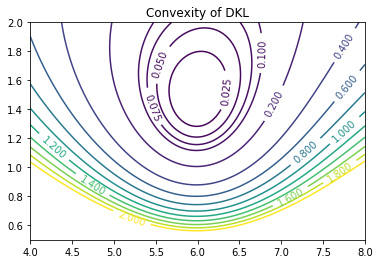

In [4]:
levels1 = np.linspace(0, 0.1, 5)
levels2 = np.linspace(0.2, 2, 10)

CS = plt.contour(MUS, SIGMAS, Z, levels=np.concatenate((levels1, levels2)))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Convexity of DKL')
plt.show()

<div style="line-height:30px;font-size:15px;">
6, 1.5 에서 최솟점이 생기는 것을 확인할 수 있고 그래프상 볼록함수로 보입니다. 이제 $\mu$, $\sigma$에 대해 수치 미분을 하면서 경사하강법을 이용해서 최적화를 하도록 하겠습니다. 즉, $Q(x;\boldsymbol{\theta})$ 라는 확률 분포에서 $\boldsymbol{\theta}=(\mu, \sigma)$를 조정하여 $P(x)$와 최대한 차이가 없게 만들겠습니다. 스탭사이즈(학습률)는 선탐색Line search하지 않고 그냥 0.1로 고정하도록 하겠습니다.(목적함수가 볼록하므로 효율을 위해서는 선탐색을 하여야 합니다. 다만 머신러닝에서는 선탐색이 별 효용이 없으므로 그냥 고정값으로 하겠습니다.) 아래 코드가 있고 자세한 주석이 달려있어 이해하기 어렵지 않을 것으로 생각합니다.
</div>

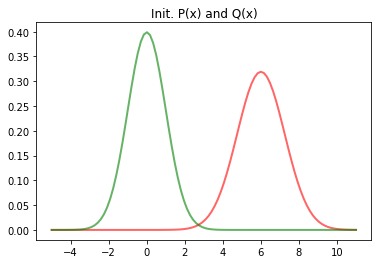

Init. Samples of P(x) : [ 6.66354488  5.42054792  5.50000437  5.08535966  9.21986506]
Init. Samples of Q(x) : [ 0.05317294  0.55764156  0.29733264 -0.70787709 -0.0614358 ]
Entorpy of P(x)  : +3.464382
DKL of P(x),Q(x) : +18.057248


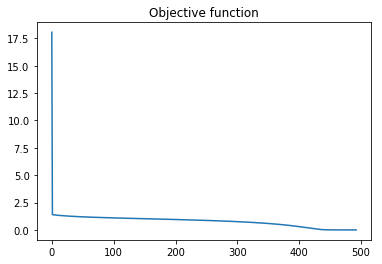

ITER:491, COST:+0.000009, mu:+5.994762, sigma:+1.250326


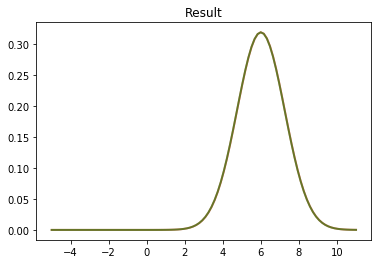

Samples of P(x) : [ 7.28329914  3.53113044  6.05022567  4.79881754  6.92992907]
Samples of Q(x) : [ 5.40751218  4.32419414  5.38011482  5.60707463  7.25062323]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

#A normal continuous random variable.
from scipy.stats import norm
from scipy import stats

h = 0.01          #미분을 위한 작은 구간
epsilon = 1.e-5   #수렴 판단을 위한 매우 작은 수
alpha = 0.1       #step size

#확률변수의 구간
x = np.linspace(-5, 11, 100)

#진짜 확률 분포를 가지는 확률변수
P = norm(6, 1.25)

#params theta = [μ, σ]  확률분포를 조정하는 파라메터는 평균과, 표준편차
mu, sigma = 0, 1.0

#P와는 많이 다른 확률분포를 가지는 확률변수
Q = norm(mu, sigma)

plt.plot(x, P.pdf(x), 'r-', lw=2, alpha=0.6, label='P pdf')
plt.plot(x, Q.pdf(x), 'g-', lw=2, alpha=0.6, label='Q pdf')
plt.title('Init. P(x) and Q(x)')
plt.show()

"""
두 확률분포는 다르기 때문에 임의로 5개씩 샘플을 추출하면 
p는 0 근처의 값이, q는 5 근처의 값이 추출됨.
"""
p = P.rvs(size=5)
q = Q.rvs(size=5)
print("Init. Samples of P(x) : {}".format(p))
print("Init. Samples of Q(x) : {}".format(q))

#P의 확률분포 엔트로피
print("Entorpy of P(x)  : {:+f}".format(stats.entropy(P.pdf(x))))

#P와 Q의 확률분포 간의 DKL
dkl = stats.entropy(P.pdf(x), Q.pdf(x))
print("DKL of P(x),Q(x) : {:+f}".format(dkl))
dkls = [dkl]

for i in range(1000):
    #경사 구하기 미분  {f(x+h)-f(x-h)} / 2h
    dmu =    (stats.entropy(P.pdf(x), norm(mu+h, sigma).pdf(x))-stats.entropy(P.pdf(x), norm(mu-h, sigma).pdf(x))) / (h*2)
    dsigma = (stats.entropy(P.pdf(x), norm(mu, sigma+h).pdf(x))-stats.entropy(P.pdf(x), norm(mu, sigma-h).pdf(x))) / (h*2)
    
    #경사하강  w = w - η* ∇f
    mu    -= alpha*dmu
    sigma -= alpha*dsigma
    
    #업데이트된 파라메터로 확률변수를 다시 만든다.
    Q = norm(mu, sigma)
    
    #목적함수를 평가하고 입실론보다 작으면 그만
    dkl = stats.entropy(P.pdf(x),Q.pdf(x))
    dkls.append(dkl)
    
    if dkl < epsilon :
        break;
    
plt.plot(dkls)
plt.title('Objective function')
plt.show()    
print("ITER:{}, COST:{:+f}, mu:{:+f}, sigma:{:+f}".format(i, dkl, mu, sigma))

plt.plot(x, P.pdf(x), 'r-', lw=2, alpha=0.6, label='P pdf')
plt.plot(x, Q.pdf(x), 'g-', lw=2, alpha=0.6, label='Q pdf')
plt.title('Result')
plt.show()

"""
이제 Q에서 뽑은 샘플을 P에서 뽑은 샘플과 구별할 수 없어졌다.
"""
p = P.rvs(size=5)
q = Q.rvs(size=5)
print("Samples of P(x) : {}".format(p))
print("Samples of Q(x) : {}".format(q))

### Keras를 이용한 100줄 짜리 확률분포 모델 GAN  
<hr/>
<div style="line-height:30px;font-size:15px;">
GANs를 살짝 맛보기 위해서 정규분포를 근사하는 문제를 풀어보겠습니다. 인터넷에 이미 시도된 몇몇 글 
<a href="https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f">GANs in 50 lines of code (PyTorch)</a>[4], 
<a href="https://github.com/hwalsuklee/tensorflow-GAN-1d-gaussian-ex">tensorflow-GAN-1d-gaussian-ex-이활석</a>[5], 
<a href="http://blog.naver.com/atelierjpro/220984758512">아주 간단한 GAN 구현하기-홍정모</a>[6]을 볼 수 있습니다. 해결해야하는 문제는 임의의 평균과 표준편차를 가지는 정규분포로 부터 획득된 학습데이터만을 가지고(평균과 표준편차는 뭔지 모름) 그 데이터의 분포를 흉내내는 모델을 만드는 것입니다. 쿨벡-라이블러 발산을 코스트로한 예제에서는 추정해야하는 모델이 정규분포라는 것을 알고 또 조정하는 설계변수가 평균과 표준편차라는 것을 알고 그것을 조절해서 최적화를 수행하였습니다. 하지만 GANs는 흉내내야하는 모델의 설계변수등 아무런 정보없이 단지 그 모델로 부터 획득된 데이터만 사용하여 그 모델처럼 동작하는 모델을 만들어내는 것입니다. 기본개념은 위 확률분포 최적화 문제와 같지만 훨씬 일반화된 상태로 문제를 풀어나갑니다.  

GANs를 numpy만으로 구현하기에는 코드양이 꽤 되고 GPU의 힘을 빌리지 않고는 훈련시키기에 많은 인내가 필요하므로 Keras를 쓰도록 하겠습니다. 우선 필요한 모듈을 로딩하고 보조 함수를 만듭니다. GAN은 D와 G를 따로 훈련시키는데 Goodfellow et al[7]에 의하면 G를 훈련할 때 D는 훈련하지 않습니다. Keras에는 모델과 레이어에 trainable이라는 속성을 제공합니다. 이 속성을 false 또는 true로 만드는 보조함수 make_trainable을 정의합니다.[8] (https://github.com/osh/KerasGAN)
</div>

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, normalization
from keras import optimizers
from keras.utils import np_utils

#np.random.seed(78)
#np.random.seed(0)

batch_size = 200
print_interval = 5000

def make_trainable(net, val):
    """
    D의 param.들을 학습안되게 했다가 학습되게 했다가 전환시키기 위한 보조함수
    """
    net.trainable = val
    for l in net.layers:
        l.trainable = val

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1070 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


<div style="line-height:30px;font-size:15px;">
그 다음 학습데이터를 생성합니다. 평균 6, 표준편차 1.25인 정규분포에서 원하는 개수만큼 숫자를 생성하여 리턴하는 get_distribution_sampler함수를 정의합니다. 이 때 생성된 숫자는 진짜 데이터이므로 라벨 1을 붙여서 되돌립니다. 
</div>

In [7]:
################################################################
# 학습 데이터 생성
################################################################
mu, sigma = 6, 1.25

def get_distribution_sampler(mu, sigma, N):
    """
    주어진 평균과 표준편차로 N개의 정규분포 난수를 발생시키고 그 라벨로 1을 붙여서 되돌림
    """
    data_xp, data_yp = np.random.normal(mu, sigma, N), np.ones(N)
    data_p = np.vstack((data_xp, data_yp)).T
    
    return data_p

<div style="line-height:30px;font-size:15px;">
이후 모델을 생성합니다. 생성할 모델은 $D$와 $G$ 그리고 이 둘이 중첩된 모델 GAN을 생성합니다.모델 정의를 위해 우선 GAN에 대한 기초 구조를 이야기 하도록 하겠습니다.<br/>
어떤 확률변수 $\boldsymbol{X}$가 있어서 이 변수가 어떤 데이터를 나타낸다고 합시다. 쉬운 예로 28x28 픽셀의 사람 얼굴이라면 요소를 784개 가지는 벡터로 생각할 수 있고 $\boldsymbol{X}$는 그 벡터를 값으로 가지는 확률 변수가 됩니다. 784개의 요소에 아무값이나 집어 넣은 임의의 벡터 $\boldsymbol{x}$는 사람 얼굴이 아닐 것입니다. 하지만 어떤 규칙에 의해 784개의 값을 적당히 잘 지정하면 벡터 $\boldsymbol{x}$는 사람얼굴 처럼 보일 수 도 있습니다. 여기서 어떤 규칙 즉, 확률변수 $\boldsymbol{X}$가 얼굴로 보이는 $\boldsymbol{x}$를 가질 확률을 나타내는 확률분포 $p(\boldsymbol{X})$가 있을 수 있습니다. 존재할 수 있는 모든 길이 784짜리 벡터가 모여있는 공간에는 사람 얼굴처럼 보이는 $\boldsymbol{x}$도 있고 전혀 아닌 $\boldsymbol{x}$도 있는데 어떤 확률변수 $\boldsymbol{X}$가 이들 표본을 가질 때 얼굴을 닮은 $\boldsymbol{x}$에 대해서 높은 확률을 부여하는 $p(\boldsymbol{X}=\boldsymbol{x})$가 존재한다는 것입니다.  $\boldsymbol{x}$가 $p(\boldsymbol{X})$에 따르면 즉, $\boldsymbol{x} \sim p(\boldsymbol{X})$이면 $\boldsymbol{x}$는 사람 얼굴이 될 것입니다. 문제는 $p(\boldsymbol{X})$가 무엇인지 전혀 알지 못합니다. 다만 $\boldsymbol{x} \sim p(\boldsymbol{X})$인 $\boldsymbol{x}$ 여러개는 가질 수 있습니다. 바로 우리가 모은 데이터입니다. 이 데이터를 이용하여 입력된 $\boldsymbol{x}$가 $p(\boldsymbol{X})$에서 추출된 것인지 아닌지를 구별하는 D를 만들고, $\boldsymbol{x}$를 무작위로 만들어 D에게 검사를 받는 G를 만들어 둘을 훈련시키는 네트워크가 GANs입니다. 여기서 $p(\boldsymbol{X})$가 무엇인지 전혀 알지 못하므로 모아둔 데이터의 분포를 나타내는 $p_{\text{data}}(\boldsymbol{X})$를 생각 해볼 수 있습니다. $p_{\text{data}}(\boldsymbol{X})$는 $p(\boldsymbol{X})$와 완전히 같지는 않겠지만 우리가 할 수 있는 최선입니다. 그리고 $G$도 어떤 규칙으로 데이터를 만들어 낼테니까 $G$에서 생성되는 데이터의 확률분포 $p_{g}(\boldsymbol{X})$를 생각해 볼 수 있습니다. 이제 $p_{\text{data}}(\boldsymbol{X})$와 최대한 비슷한 $p_{g}(\boldsymbol{X})$를 만드는것이 우리의 목표입니다.  
우선 $D$를 훈련 시키기 위한 코스트를 살펴보겠습니다.
<br/><br/>
$$ J^{D} \left( \boldsymbol{\theta}^{(D)} , \boldsymbol{\theta}^{(G)} \right) 
= - \frac{1}{2} \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \log D( \boldsymbol{x} ) 
- \frac{1}{2} \mathbb{E}_{\boldsymbol{z}} \log \left(1-D\left(G(\boldsymbol{z})\right)  \right)
$$
<br/>
위 식은 일반적인 바이너리 크로스엔트로피 식인데 보통의 경우와 약간 다른 점이 있습니다. 아래 그림을 보면 첫째 행에 일반적인 바이너리 크로스엔트로피 식을 적었고 두번째 행에 논문에서 사용하는 형태의 표기로 바꾼 식이 적혀 있습니다. 대응되는 같은 부분을 같은 색으로 표시했습니다. 여기서 두번째 항에 확률분포를 살짝 바꾼식이 세번째 행에 있는 식, 즉 위 식이 됩니다. 이렇게 해놓고 보면 세번째 식의 각 항은 앞서 알아보았던 크로스엔트로피가 된다는 것을 알 수 있습니다. 그리고 그것들이 더해진 형태입니다. NIPS 2016 Tutorial:Generative Adversarial Networks[9]의 설명문을 그림밑에 인용하였습니다.

<img src="7.png" width="550">

</div>

>"This is just the standard cross-entropy cost that is minimized when training
a standard binary classifier with a sigmoid output. The only difference is that
the classifier is trained on two minibatches of data; one coming from the dataset,
where the label is 1 for all examples, and one coming from the generator, where
the label is 0 for all examples."

<div style="line-height:30px;font-size:15px;">

위 식에서 $\boldsymbol{\theta}^{(D)}$는 $D(\boldsymbol{x})$를 조정하는 매개변수, $\boldsymbol{\theta}^{(G)}$는 $G(\boldsymbol{z})$를 조정하는 매개변수입니다. 먼저 첫번째 항에 대해 이야기하면 $D(\boldsymbol{x})$는 데이터 $\boldsymbol{x}$를 입력받아 0~1을 출력하는 함수입니다. $\boldsymbol{x} \sim p_{\text{data}}$는 우리가 모은 데이터의 확률분포에서 추출한 데이터 $\boldsymbol{x}$라는 뜻으로 그냥 우리의 데이터셋에서 뽑은 데이터라는 뜻입니다. 즉, 진짜 데이터가 되겠습니다. 이 진짜 데이터에 대한 기대값이란 의미이며 또는 $\boldsymbol{x}$에 대한 평균으로 생각해도 되겠습니다. 두번째 항에서 $G(\boldsymbol{z})$는 잠재변수latent variable $\boldsymbol{z}$를 입력받아 우리가 원하는 데이터를 출력하는 함수입니다. 잠재변수는 보통 노이즈인데 우리 예제에서는 균등분포 난수를 사용하겠습니다. 이는 목표로 하는 확률분포가 정규분포인데 $G$의 입력을 정규분포로 넣어주는 것보다 균등분포로 넣어주는 것이 문제를 더 어렵게 만들기 때문입니다. 이것이 다시 $D$에 입력되니 결국 0~1의 값이 되고 $D$가 똑똑하다면 0 근처의 값을 출력해야 합니다. G를 고정시키고(지금 $G$는 그냥 열심히 가짜 데이터를 만들기만 하면 됨) $\boldsymbol{\theta}^{(D)}$에 대해서 위 식을 최소화 시킵니다. 자세한 상황은 아래 그림과 같습니다.
<br/>
<img src="6.png" width="650">
<br/>
즉, 아래 식과 같이 그래디언트를 구하고 $\boldsymbol{\theta}^{(D)}$를 업데이트 시켜 나가면 $D$는 점점 똑똑해집니다. 아래 식은 Goodfellow et al[7]의 Algorithm 1에 나와 있는 식입니다. 각 항의 부호가 바뀐것과 기대값 표시가 평균을 구하는 방법으로 바뀐것만 빼면 위 식과 동일한 식입니다. 부호가 바뀌었으므로 이 경우는 $\boldsymbol{\theta}^{(D)}$에 대해 최대화 시켜야 합니다.
<br/><br/>
$$ 
\bigtriangledown_{\theta^{(D)}} \frac{1}{m} \sum_{i=1}^{m} \left[  \log D\left(\boldsymbol{x}^{(i)}\right) + \log \left( 1-D\left(G(\boldsymbol{z}^{(i)})\right) \right)\right] 
$$
<br/>
실제 구현에 있어서 $\log D\left(\boldsymbol{x}^{(i)}\right)$에 대한 함수를 만들고 라벨값으로 1을 넣어주고,
$\log \left( 1-D\left(G(\boldsymbol{z}^{(i)})\right)\right)$데 대한 함수를 만들고 라벨값으로 0을 넣어주고, 
두 함수를 더하는 방식으로 구현하면 됩니다. 아래는 김남주님의 <a href="https://www.slideshare.net/ssuser77ee21/generative-adversarial-networks-70896091">GAN 슬라이드</a>[10]에 나오는 구현 부분입니다.
</div>

```python
#loss for discriminator
loss_disc_real = tf.nn.sigmoid_cross_entropy_with_logits(disc_real, targets=tf.ones(batch_size))
loss_disc_fake = tf.nn.sigmoid_cross_entropy_with_logits(disc_fake, targets=tf.zeros(batch_size))

loss_disc = 0.5 * loss_disc_real + 0.5 * loss_disc_fake
```

<div style="line-height:30px;font-size:15px;">
텐서플로로 구현되어 있는데 리얼 데이터와 라벨로 1을, 페이크 데이터와 라벨 0을 크로스엔트로피 로스에 넘기고 그 둘을 더해서 수식과 동일하게 처리하고 있습니다. 또는 라벨값은 0 아니면 1이므로 리얼과 페이크를 구별하지 않고 그냥 모두 트레이닝 배치에 집어넣고 아래와 같이 바이너리 크로스엔트로피 식으로 처리해도 됩니다. 우리는 Keras에 있는 binary_crossentropy 함수를 사용하도록 하겠습니다.
<br/><br/>
$$ \bigtriangledown_{\theta^{(D)}} \frac{1}{m} \sum_{i=1}^{2m} \left[  y^{(i)}\log D\left(x^{(i)}\right) + (1-y^{(i)})\log \left( 1-D\left(G(z^{(i)})\right) \right)\right] 
$$
<br/>
이제 $G$에 대한 코스트를 살펴보겠습니다. 
$G$에 대한 코스트는 $D$에 대한 코스트에 - 부호를 붙여서 그것을 최소화 하면 됩니다.
<br/><br/>
$$J^{G} = - J^{D} $$
<br/>
그래서 아래처럼 다시 함수를 정의 하면
<br/><br/>
$$ V \left( \boldsymbol{\theta}^{(D)} , \boldsymbol{\theta}^{(G)} \right) = -J^{(D)} \left( \boldsymbol{\theta}^{(D)} , \boldsymbol{\theta}^{(G)} \right) $$
<br/>
으로 쓸 수 있고 GANs가 해결해야하는 문제를 종합적으로 말하자면 이 벨류펑션을 $\boldsymbol{\theta}^{(D)}$에 대해서 최대화,  $\boldsymbol{\theta}^{(G)}$에 대해서 최소화하는 문제가 됩니다.
<br/><br/>
$$
\boldsymbol{\theta}^{(G)*} = \underset{\boldsymbol{\theta}^{(G)}}{\text{argmin}} \, \underset{\boldsymbol{\theta}^{(D)}}{\text{argmax}}  = \frac{1}{2} \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \log D( \boldsymbol{x} ) 
+ \frac{1}{2} \mathbb{E}_{\boldsymbol{z}} \log \left(1-D \left( G(\boldsymbol{z}) \right)  \right)
$$
<br/>
위 식에서 $\log D(\boldsymbol{x})$ 부분은 $G$와 아무 상관이 없는 항입니다. 따라서 $G$는 식의 뒷부분인  $\frac{1}{2} \mathbb{E}_{z} \log \left(1-D(G(\boldsymbol{z}) \right)$를 최소화시키면 됩니다. 그런데 전체 식이 $D$에 대해서 최대화 되었다는 말은 코스트 함수에서 어느정도 평탄한 부분에 도달했다는 말이 됩니다. 그 상태에서 뒷 부분을 코스트로 해서 그래디언트를 계산하고 이를 다시 최소화 시킨다고 했을 때 기울기 값이 크지 않아 최소화 시키기가 힘들 수 있습니다. $D$는 최대화된 최적점에 가버리고 거기서 $G$는 다시 낮은 곳으로 가야하는데 기울기가 없어서 꾸물꾸물 거리게 되는 것입니다. 그래서 논문에서는 식을 약간 변형한 형태인 아래 식으로 코스트 함수를 설정하는 것이 효율적이라 합니다.
<br/><br/>
$$ J^{G} = -\frac{1}{2} \mathbb{E}_{z} \log \left(D(G(\boldsymbol{z}) \right) $$
<br/>
각 형태에 대한 상황을 그림으로 정리했습니다.
<br/>
<img src="5.png" width="680">
<br/>
둘 다 최소화 시키는 코스트로 사용 가능한데 우리 실험에서는 아래와 같이 그래디언트를 구하고 $G$를 업데이트 하도록하겠습니다.
<br/><br/>
$$ \bigtriangledown_{\theta^{(G)}} \left( - \frac{1}{m}\sum_{i=1}^{m} \log D\left(G(\boldsymbol{z}^{(i)})\right) \right)$$
<br/>
Keras에서 제공하는 mean_squared_logarithmic_error 함수를 사용하겠습니다. GANs의 구조는 대충 알아보았으므로 Keras를 이용해서 모델을 만들겠습니다. 특별히 신기술(?)은 적용하지 않고 활성함수로 relu정도만 사용하고 나머지는 평이하게 구성했습니다.
</div>

In [8]:
################################################################
# 모델 생성
################################################################

#Discriminator
D = Sequential()
D.add(Dense(30, activation='relu', input_dim=1))
D.add(Dense(30, activation='relu'))
D.add(Dense( 2, activation='softmax'))
D_opt = optimizers.Adam(lr=0.001*1.58, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
D.compile(loss='binary_crossentropy', optimizer=D_opt, metrics=['accuracy'])
D.summary()

#Generator
G = Sequential()
G.add(Dense(20, input_dim=1))
G.add(Activation('sigmoid'))
G.add(Dense(40))
G.add(Activation('sigmoid'))
G.add(Dense(1))
#G.add(Activation('linear'))
G.summary()

#GAN 1 - D(G(z))
# 이 모델을 훈련시킬때 D는 업데이트 되면 안되므로 D의 trainable 을 False로 세팅
make_trainable(D, False)
gan_input = Input(shape=[1])
GAN = Model( gan_input, D(G(gan_input)) )
G_opt = optimizers.Adam(lr=0.001*1.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
GAN.compile(loss='mean_squared_logarithmic_error', optimizer=G_opt )
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 62        
Total params: 1,052
Trainable params: 1,052
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                40        
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 

<div style="line-height:30px;font-size:15px;">
일단 초기 G가 균등분포 노이즈를 받아서 어떤 값을 출력하는지 그려보도록하겠습니다.
</div>

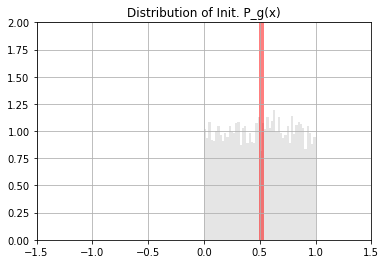

G가 만들어낸 값 10개
[[ 0.491036  ]
 [ 0.51990318]
 [ 0.52715808]
 [ 0.5348295 ]
 [ 0.5243696 ]
 [ 0.52756739]
 [ 0.49337378]
 [ 0.52823377]
 [ 0.52532172]
 [ 0.53196764]]


In [9]:
################################################################
#학습전에 G로 부터 숫자 생성하고 분포를 그려봄
################################################################
Z1 = np.random.uniform(0,1,10000)
fake1 = G.predict(Z1)
n, bins1, patches = plt.hist(Z1, 50, normed=1, facecolor='grey', alpha=0.2)
plt.title('Distribution of Init. P_g(x)')
n, bins, patches = plt.hist(fake1, 50, normed=1, facecolor='red', alpha=0.5)
plt.grid(True)
plt.axis([-1.5, 1.5, 0, 2])
plt.show()
print("G가 만들어낸 값 10개")
print(fake1[:10])

<div style="line-height:30px;font-size:15px;">
$G$가 토해내는 $p_{g}(\boldsymbol{x})$는 빨간색으로 표시되는데 그냥 무작위로 나오고 있습니다. 이 $G$를 훈련시켜서 6을 중심으로 종모양으로 퍼지는 모델을 만드는 것이 목표입니다. 경험적으로 알 수 있는 사실이지만 $G$의 학습보다는 $D$의 학습이 더 중요하므로 $D$를 미리 학습을 한번 시킵니다. Goodfellow의 비유처럼 $G$는 위폐범인데 $D$가 위폐를 잘 골라내지 못한다면 $G$가 적당히 만들어도 $D$는 진짜 지폐라고 판단할 것이고 $G$는 집중적으로 그 위폐만 만들게 됩니다. 실제로 $G$가 더 잘 훈련이 되면 우리의 문제에서 $G$는 거의 모든 값을 6근처의 값으로 집중적으로 만드는 모습을 확인할 수 있습니다. 그래서 왠만하면 $D$가 $G$의 결과를 잘 판단하도록 훈련시켜야 합니다. 그의 논문에서 정확히 언급하고 있습니다. 
</div>

>"in particular, G must not be trained too much without updating D, in order to avoid “the Helvetica scenario” in which G collapses too many values of $\boldsymbol{z}$ to the same value of $\boldsymbol{x}$ to have enough diversity to model $p_{\text{data}}$"

<div style="line-height:30px;font-size:15px;">
$G$가 너무 많은 $\boldsymbol{z}$ 값을 같은 $\boldsymbol{x}$값으로 몰리게 해서 $p_{data}$를 묘사하기에 충분한 다양성을 가지지 못하는 문제를 피해야한다는 말입니다. 그래서 먼저 $D$를 선학습 시킵니다. (여러번 실험해보면 이 과정이 꼭 필요한것 같지는 않은데 왠지 하면 좀 더 잘되는 느낌은 있습니다.;;)
</div>

In [10]:
################################################################
# Discriminator 미리 학습
################################################################
print("*----------------------------------------------------------------")
print("* Discriminator 미리 학습")
print("*----------------------------------------------------------------")
make_trainable(D, True)
k = 200
real_mb = get_distribution_sampler(mu, sigma, batch_size*k)
fake_mb = np.hstack(
            ( G.predict( np.random.uniform(0,1,batch_size*k) ) , 
              np.zeros(batch_size*k).reshape(batch_size*k,1) 
            )
        )

print("- 진짜 샘플 5개")
print(real_mb[:5])

print("\n")
print("- 가짜 샘플 5개")
print(fake_mb[:5])
print("\n")

train_D = np.vstack((real_mb, fake_mb))
train_D = train_D[np.random.permutation(train_D.shape[0]), :]
train_Dx = train_D[:,0]
train_Dy = np_utils.to_categorical(train_D[:,1], 2)

D.fit(train_Dx, train_Dy, epochs=1, batch_size=batch_size)

print("\n")
print("*----------------------------------------------------------------")
print("* 선학습된 Discriminator 테스트")
print("*----------------------------------------------------------------")
Z = np.concatenate((real_mb[:5,0], fake_mb[:5,0]))
detec = D.predict(Z)

print("- Discriminator의 예측")
print("    입력             출력1            출력2")
print(np.hstack((Z.reshape(10,1), detec)))

*----------------------------------------------------------------
* Discriminator 미리 학습
*----------------------------------------------------------------
- 진짜 샘플 5개
[[ 6.68444115  1.        ]
 [ 6.36763976  1.        ]
 [ 7.80758091  1.        ]
 [ 4.53754296  1.        ]
 [ 5.21056491  1.        ]]


- 가짜 샘플 5개
[[ 0.5125246   0.        ]
 [ 0.51059741  0.        ]
 [ 0.52134663  0.        ]
 [ 0.52095461  0.        ]
 [ 0.49219534  0.        ]]


Epoch 1/1
80000/80000 [==============================] - 0s - loss: 0.1023 - acc: 0.9739     


*----------------------------------------------------------------
* 선학습된 Discriminator 테스트
*----------------------------------------------------------------
- Discriminator의 예측
    입력             출력1            출력2
[[  6.68444115e+00   8.25808977e-10   1.00000000e+00]
 [  6.36763976e+00   3.05065284e-09   1.00000000e+00]
 [  7.80758091e+00   8.90559241e-12   1.00000000e+00]
 [  4.53754296e+00   5.79159314e-06   9.99994159e-01]
 [  5.21056491e+00   

<div style="line-height:30px;font-size:15px;">
$D$가 선학습되어 트레이닝 데이터에 대해 매우 높은 정확도를 보이게 되었습니다. 이제 본 학습에 들어가는데 GANs에서 제안한 대로 $D$와 $G$의 업데이트 비율을 조절하면서 학습합니다. 여기서는 $D$ 3번 업데이트하고 $G$를 한번 업데이트하는 식으로 학습을 진행하였습니다.
</div>

*----------------------------------------------------------------
* 본 학습 시작
*----------------------------------------------------------------


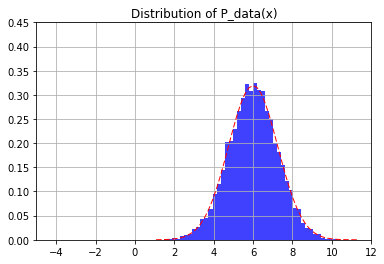

Epoch : 0, D:[array(0.006260748021304607, dtype=float32), array(0.9975000023841858, dtype=float32)], G loss:0.4781073331832886


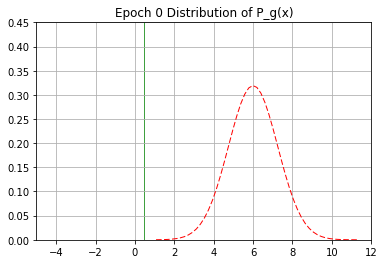

Epoch : 5000, D:[array(1.0960466312326389e-07, dtype=float32), array(1.0, dtype=float32)], G loss:0.48045283555984497


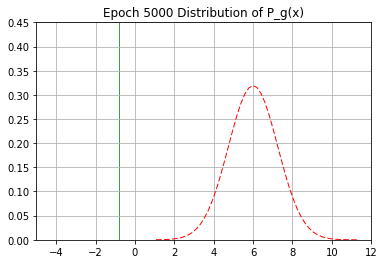

Epoch : 10000, D:[array(1.0960466312326389e-07, dtype=float32), array(1.0, dtype=float32)], G loss:0.48045283555984497


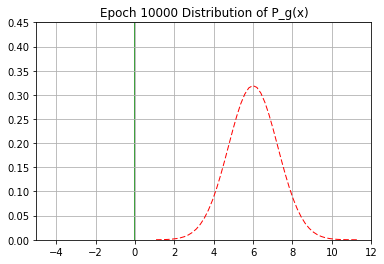

Epoch : 15000, D:[array(0.6459751725196838, dtype=float32), array(0.612500011920929, dtype=float32)], G loss:0.14864879846572876


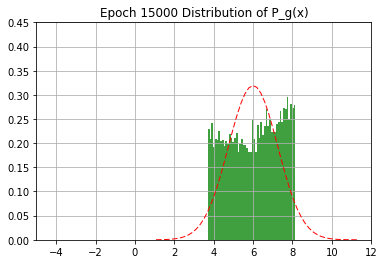

Epoch : 20000, D:[array(0.6478808522224426, dtype=float32), array(0.5849999785423279, dtype=float32)], G loss:0.1522078514099121


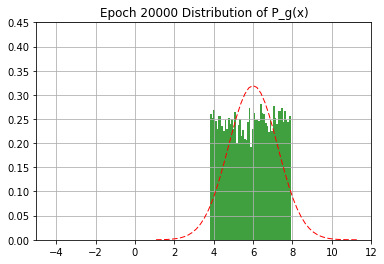

Epoch : 25000, D:[array(0.6298986673355103, dtype=float32), array(0.5824999809265137, dtype=float32)], G loss:0.13378502428531647


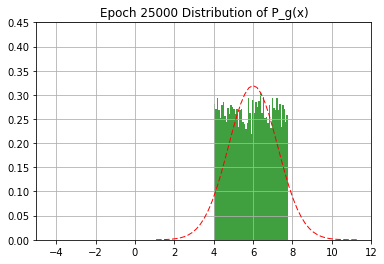

Epoch : 30000, D:[array(0.6259119510650635, dtype=float32), array(0.5924999713897705, dtype=float32)], G loss:0.14465180039405823


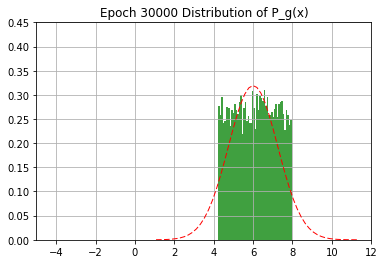

Epoch : 35000, D:[array(0.645881175994873, dtype=float32), array(0.5774999856948853, dtype=float32)], G loss:0.1455087661743164


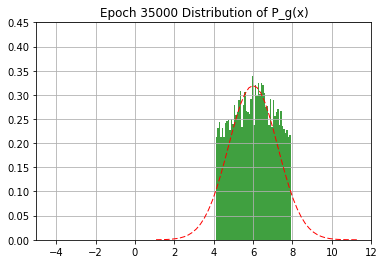

Epoch : 40000, D:[array(0.6705172061920166, dtype=float32), array(0.5174999833106995, dtype=float32)], G loss:0.13108354806900024


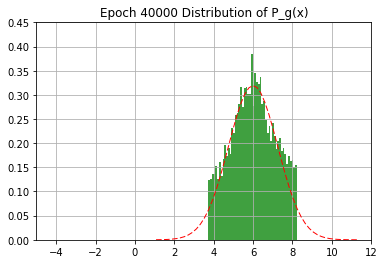

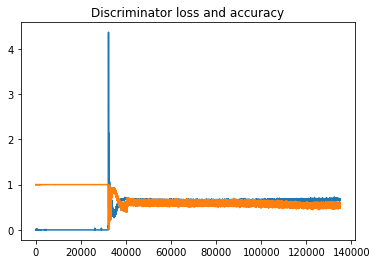

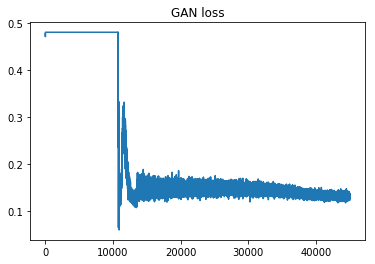

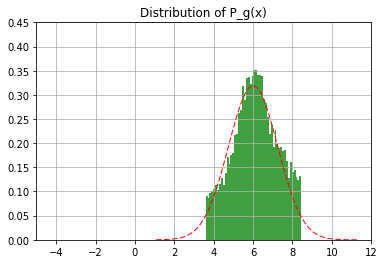

[[ 3.88417435]
 [ 6.38488531]
 [ 6.92629957]
 [ 7.74166536]
 [ 6.69731283]
 [ 6.96260023]
 [ 4.31207705]
 [ 7.02328825]
 [ 6.77207232]
 [ 7.40280771]]


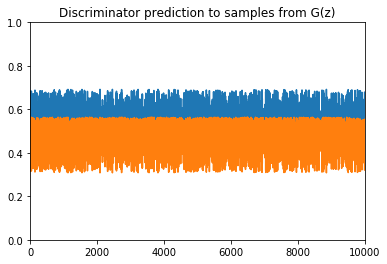

[[ 0.53172719  0.46827284]
 [ 0.48797449  0.51202548]
 [ 0.46306628  0.53693372]
 [ 0.58682293  0.41317704]
 [ 0.47358564  0.52641439]
 [ 0.46170425  0.53829575]
 [ 0.4780958   0.52190423]
 [ 0.47148177  0.52851826]
 [ 0.47014824  0.52985179]
 [ 0.53282434  0.46717566]]


In [11]:
################################################################
# 본학습
################################################################
print("*----------------------------------------------------------------")
print("* 본 학습 시작")
print("*----------------------------------------------------------------")

# the histogram of the data
plt.title('Distribution of P_data(x)')    
n, bins1, patches = plt.hist(get_distribution_sampler(mu, sigma, 10000)[:,0], 50, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf(bins1, mu, sigma)
l = plt.plot(bins1, y, 'r--', linewidth=1)
plt.axis([-5, 12, 0, 0.45])
plt.grid(True)
plt.show()

nb_epoch = 45000
D_losses = []
GAN_losses = []

for epoch in range(nb_epoch) :
    #train D
    for k in range(3):
        #진짜 데이터를 받아온다.
        real_mb = get_distribution_sampler(mu, sigma, batch_size)
        #가짜 데이터를 받아온다.
        fake_mb = np.hstack(
                        ( G.predict( np.random.uniform(0,1,batch_size) ) , 
                          np.zeros(batch_size).reshape(batch_size,1) 
                        )
                    )
        #진짜 가짜를 섞어서
        train_D = np.vstack((real_mb, fake_mb))
        train_D = train_D[np.random.permutation(train_D.shape[0]), :]
        train_Dx = train_D[:,0]
        train_DY = np_utils.to_categorical(train_D[:,1], 2)
        #학습을 한다.
        d_loss = D.train_on_batch(train_Dx, train_DY)
        D_losses.append(d_loss)
    
    #train GAN for G  균등분포 난수와 , 라벨 1을 입력으로 학습힌다.
    g_loss = GAN.train_on_batch( np.random.uniform(0,1,batch_size) , np_utils.to_categorical(np.ones(batch_size),2) )
    GAN_losses.append(g_loss)
        
    if epoch % print_interval == 0:
        print( "Epoch : {}, D:{}, G loss:{}".format(epoch, d_loss, g_loss) )

    if epoch % 5000 == 0 :
        fake = G.predict(Z1)
        plt.title('Epoch {} Distribution of P_g(x)'.format(epoch))
        plt.hist(fake, 50, normed=1, facecolor='green', alpha=0.75)
        l = plt.plot(bins1, y, 'r--', linewidth=1)
        plt.axis([-5, 12, 0, 0.45])
        plt.grid(True)
        plt.show()
        
#################################################################
# 그림 그리는 보조 코드들
#################################################################
plt.title('Discriminator loss and accuracy')    
plt.plot(D_losses)
plt.show()

plt.title('GAN loss')    
plt.plot(GAN_losses)
plt.show()

fake = G.predict(Z1)
plt.title('Distribution of P_g(x)')
plt.hist(fake, 50, normed=1, facecolor='green', alpha=0.75)
l = plt.plot(bins1, y, 'r--', linewidth=1)
plt.axis([-5, 12, 0, 0.45])
plt.grid(True)
plt.show()
print(fake[:10])

plt.title('Discriminator prediction to samples from G(z)')
detec = D.predict(fake)
plt.plot(detec)
plt.axis([0, 10000, 0, 1])
plt.show()
print(detec[:10])

결과를 다시 한번 찍어보면 아래처럼 모양이 그럭저럭 잘 나오는 것을 확인할 수 있습니다.

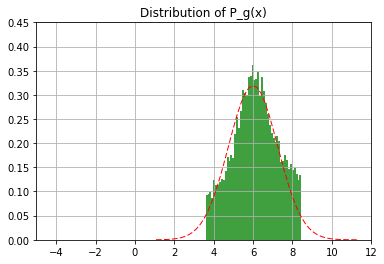

In [12]:
plt.title('Distribution of P_g(x)')
plt.hist(G.predict(np.random.uniform(0,1,10000)), 50, normed=1, facecolor='green', alpha=0.75)
l = plt.plot(bins1, y, 'r--', linewidth=1)
plt.axis([-5, 12, 0, 0.45])
plt.grid(True)
plt.show()

<div style="line-height:30px;font-size:15px;">
$z$에 대한 $G(z)$함수를 확인해보면 다음과 같습니다.
</div>

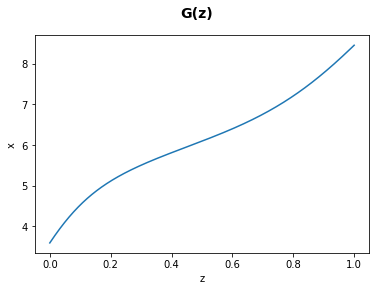

In [13]:
Z = np.linspace(0,1,1000)
X = G.predict(Z)

fig = plt.figure()
fig.suptitle('G(z)', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('z')
ax.set_ylabel('x')
plt.plot(Z,X)
plt.show()

<div style="line-height:30px;font-size:15px;">
위 그래프를 보면 $z$=0 근방에서 기울기가 급하고 0.2~0.8까지 기울기가 완만하다가 0.8 이상에서 다시 기울기가 증가하는 모습을 확인할 수 있습니다. 히스토그림 결과를 보면 8 근방의 값이 목표보다 많이 생성되고 있는것이 확인되는데 이는 $G(\boldsymbol{z})$의 매핑상태가 0.0~0.2구간보다 기울기가 완만하게 이루어져 있어서 그렇게 된 것입니다. 좀 더 이상적인 함수 $G(\boldsymbol{z})$는 다음과 같은 모양이 될 것입니다.

<br/><br/>
<img src="15.png" width="300">
<br/>

어쨌거나 우리는 분포를 아는 확률변수 $\boldsymbol{z}$로 부터 어떤 매핑을 통해 $p_{g}(\boldsymbol{x})$를 분포로 가지는 확률변수 $\boldsymbol{x}$를 만들어주는 함수 $G(\boldsymbol{z})$를 찾아냈습니다. (일반 적으로 $\boldsymbol{z}$도 벡터 변수인데 우리 예제에서는 0~1사이의 숫자라서 엄밀히 말하면 볼드 $\boldsymbol{z}$가 아니라 그냥 $z$ 임)
<br/><br/>
실습을 통해 다음과 같은 사실을 알 수 있습니다.
<br/>
1. 초록색 분포가 100줄짜리 프로그램(주석과 그림 그리는 부분 빼면 얼추 100줄;;;) 치고는 $p_{data}$ 분포를 꽤 잘 따라가고 있습니다.<br/>
2. D의 정밀도가 처음에는 1.0으로 시작했다가(위 주황색 그래프) 점점 0.5 근처로 수렴하고 있습니다. 마지막 부분에 실제 softmax층에서 나온 출력을 보면 두 값 모두 0.5 근처로 뭐가 뭔지 모르겠다고 결과를 내보내고 있습니다.<br/>
3. 하지만 G, D가 평형점을 정확히 찾지 못하고 왔다갔다 진동하고 있는 모습을 보입니다. 이에 대해서는 <a href="https://www.facebook.com/groups/TensorFlowKR/permalink/456848987989498/">TF-KR의 유재준님 논문 발표</a>[11]에서 확인할 수 있습니다. 계속 학습을 진행하면 결과가 오히려 나빠지는 경우도 많이 나타납니다.<br/>
4. 학습이 초기조건에 꽤 민감하게 반응합니다. 위 결과는 한 서너번 반복해서 나온 괜찮은 결과입니다.<br/>
</div>

## 약간의 이론
<hr/>

<div style="line-height:30px;font-size:15px;">
논문에서 GANs의 이론적 논의는 $\max_{D} V(G,D)$가 G에 대해 전역적 최소를 가지고 그것이 $p_{data}=p_{g}$일 때이며 상기 알고리즘으로 그 전역 최소에 도달할 수 있는지 보이는 것입니다. 크게 3가지 부분으로 이 문제를 설명합니다. 이미 TF-KR의 유재준님께서 이론 부분을 리뷰한 훌륭한 문서들이 존재하는데 <a href="https://www.slideshare.net/thinkingfactory/pr12-intro-to-gans-jaejun-yoo">[11]</a><a href="http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-1.html">[12]</a> 여기서는 이 문서들을 참고하고 조금 더 친철하게 내용을 보충하여 설명해보도록 하겠습니다. 각각 알아보기 앞서 우선 한가지 짚어야 할 부분이 있습니다. 
</div>

>*The generator G implicitly deﬁnes a probability distribution $p_g$ as the distribution of the samples $G(z)$ obtained when $z ∼ p_z$.* 


<div style="line-height:30px;font-size:15px;">
바로 위 부분인데요. $G$와 $p_g$가 동일한 것이 아니라는 것입니다. $G$는 제너레이터고 $p_g$는 그 제너레이터가 암시적으로 정의하는 확률 분포입니다. 다시말하면  실제로 $G$는 잠재변수 $\boldsymbol{z}$로 부터 샘플 $G(\boldsymbol{z})$를 생성할 뿐이지 $p_g$를 직접적으로 정의 하지 않는다는 것입니다. 우리의 학습 알고리즘이 $G$의 매개변수를 변경하면서 샘플의 분포를 변경하면 암시적으로 $p_g$가 변할 것이고 그것이 $p_{data}$와 비슷하기를 바라는 것입니다. 
확률밀도함수 $p_{\boldsymbol{z}}(\boldsymbol{z})$를 정확히 알고 있는 확률변수 $\boldsymbol{Z}$로부터 어떤 함수 관계 $\boldsymbol{x}=G(\boldsymbol{z})$에 의해 또다른 확률변수 $\mathbf{X}$가 정의될 때 "Change of variable  formula"에 의해 $\mathbf{X}$의 확률밀도함수를 구할 수 있습니다.<a href="https://onlinecourses.science.psu.edu/stat414/node/157">[13]</a><a href="http://nbviewer.jupyter.org/github/metamath1/ml-simple-works/blob/master/GAN/change_of_variable.ipynb">[14]</a>
하지만 우리는 $p_g$를 구할 것이 아니라 $p_g$를 따르는 $\boldsymbol{X}$를 생성하는 $G$ ($\boldsymbol{z}$를 적절한 $\boldsymbol{x}$로 바꿔주는)를 구할 것입니다. 이 개념을 확실히 새기고 각각 하나씩 살펴보도록 하겠습니다. 
($p_g$를 명시적으로 구하는 경우에 있어서 함수 $G(\boldsymbol{z})$의 역함수 존재 여부가 문제가 될 수 있는데 역함수가 존재하지 않더라도 역함수가 존재하는 구역으로 세분화해서 "Change of variable  formula"를 적용하여 $p_g$를 구할 수 있습니다. 역함수의 존재 여부는 문제가 되지 않는다는 <a href="https://www.facebook.com/groups/TensorFlowKR/permalink/475819116092485/">TF-KR의 토론</a>이 있었습니다.)
</div>

<hr/>

> <b style="color:red"> Proposition 1. </b>  *For G ﬁxed, the optimal discriminator D is*
$$
D^{*}_{G}(\boldsymbol{x}) = \frac{p_{data}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})}
$$

<div style="line-height:30px;font-size:15px;">
Proposition 1은 $G$가 고정된 상태에서 최적의 $D$는 위 식으로 주어진다는 것을 이야기 하며 이를 보이기 위해서는 $\frac{\partial V(G,D)}{\partial D(\boldsymbol{x})}=0$  또는 ($ V(G,D) = -J^{D}$ 이므로) $\frac{\partial J^{D}}{\partial D(\boldsymbol{x})}=0$ 인 $D(\boldsymbol{x})$를 구하면 됩니다. 우선 논문의 식(3)은 다음과 같습니다. 논문에서 $p_{g}(\boldsymbol{x})$, $p_{\boldsymbol{x} \sim g}(\boldsymbol{x})$와 같은 표현을 혼용하는데 큰 차이는 없으므로 여기서도 최대한 논문에 맞추도록 하겠습니다.
<br/><br/>
$$
\begin{align}
V(G,D) &= \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + \int_{z} p_{z}(z) \log (1-D(g(z))) dz \\
&= \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + p_{g}(\boldsymbol{x}) \log (1-D(\boldsymbol{x})) d\boldsymbol{x}
\end{align}
$$
<br/>
두번째 적분항의 적분 도메인이 $z$에서 $\boldsymbol{x}$로 바뀌게 되는데 
이 때 특정 도메인 $Z$가 있어서 $z \in Z$에 대한 확률 $P(z \in Z)$는 $x = g(z)$에 의해 변환된 도메인 $X$에서 $x \in X$에 대한 확률 $P(x \in X)$와 같으므로 
<br/><br/>
$$\int_{z \in Z} p(z) dz = \int_{x=g(z) \, \in \, X=g(Z)} p(x) dx$$
<br/>
이고 따라서 다음이 성립합니다.

<br/><br/>
$$\int_{z \in Z} p(z)f(g(z)) dz = \int_{x \in X} p(x)f(x) dx$$
<br/>
이에 대해서는 요슈아 벤지오 교수에게 메일로 질문을 해서 아래와 같은 답변을 받아 정리를 했습니다.
</div>

>There is no need for the change of variable formula. $\int p_x(x) f(x) dx = \int p_z(z) f(g(z)) dz$ because  $ \int p_x(x) dx$ is already equal by definition to $\int_{z: x=g(z)} p_z(z) dz$ 

<div style="line-height:30px;font-size:15px;">
또는 다음과 같이 유도할 수도 있습니다.
<br/><br/>
$$
\begin{align}
V(G,D) 
&= \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + \int_{z} p_{z}(z) \log (1-D(g(z))) dz \\[4pt]
&= \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + \int_{\boldsymbol{x}} p_{z}(g^{-1}(\boldsymbol{x})) \log (1-D(g(g^{-1}(\boldsymbol{x})))) \left| \frac{dz}{d\boldsymbol{x}} \right| dz \quad \because z = g^{-1}(\boldsymbol{x}),\text{change of variable} \\[4pt]
&= \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + \int_{\boldsymbol{x}} p_{z}(g^{-1}(\boldsymbol{x}))\left| \frac{dz}{d\boldsymbol{x}} \right| \log (1-D(\boldsymbol{x}))  dx    \\[4pt]
&= \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + \int_{\boldsymbol{x}} p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) \log (1-D(\boldsymbol{x}))  d\boldsymbol{x}  \quad \because p_{\boldsymbol{x} \sim g}(\boldsymbol{x})=p_{z}(g^{-1}(\boldsymbol{x}))\left| \frac{dz}{d\boldsymbol{x}} \right|
\end{align}
$$
<br/>
이제 미분을 하면 
<br/><br/>
$$
\begin{align}
\frac{\partial V(G,D)}{\partial D(\boldsymbol{x})} 
&= \frac{\partial}{\partial D(\boldsymbol{x})} \int_{\boldsymbol{x}} p_{x \sim data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) \log (1-D(\boldsymbol{x})) d\boldsymbol{x} \\[3pt]
&= \int_{\boldsymbol{x}} \frac{\partial}{\partial D(\boldsymbol{x})}  \left[ p_{\boldsymbol{x} \sim data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) \log (1-D(\boldsymbol{x})) \right] d\boldsymbol{x} \\[3pt]
&= \int_{\boldsymbol{x}} p_{\boldsymbol{x} \sim data}(\boldsymbol{x}) \frac{1}{D(\boldsymbol{x})} - p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) \frac{1}{1-D(\boldsymbol{x})} d\boldsymbol{x} 
\end{align}
$$
<br/>
이므로
<br/><br/>
$$
\int_{x} \frac{p_{\boldsymbol{x} \sim data}(\boldsymbol{x})\left( 1-D(\boldsymbol{x}) \right) - p_{\boldsymbol{x} \sim g}(\boldsymbol{x})D(\boldsymbol{x})}{D(\boldsymbol{x})\left(1-D(\boldsymbol{x}) \right)} d\boldsymbol{x} =0
$$
<br/>
입니다.  
위 적분식이 0이 되기 위해서는 Integrand의 분자가 0 인 경우를 생각해 볼 수 있습니다. 그런데 분자는 0보다 크거나 같다는 것을 알지 못하므로 꼭 분자가 0이 아니더라도 적분식이 0이 될 수 가 있습니다.(적당히 +,- 해서 총합이 0)  따라서 $\frac{\partial V(G,D)}{\partial D(\boldsymbol{x})}=0$를 만족하는 $D(\boldsymbol{x})$가 지역 최소(또는 지역 최대)나 안장점이 아니기 위해서는 $V(G,D)$가 볼록함을(또는 오목함을) 보여야 합니다. $ V(G,D) = -J^{D}$ 이므로 $J^{D}$가 볼록함수인지를 보여도 되는데 만약 $J^{D}$가 엄격하게 볼록하다면 전역 최소를 가지며 분자가 0인 경우가 $\frac{\partial J^{D}}{\partial D(\boldsymbol{x})}=0$ 인 유일한 전역 최소라 할 수 있습니다.
<br/><br/>
$$
\begin{align}
J^{D} &= -\int_{\boldsymbol{x}} p_{\boldsymbol{x} \sim data}(\boldsymbol{x}) \log D(\boldsymbol{x}) + p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) \log (1-D(\boldsymbol{x})) d\boldsymbol{x} \\[3pt]
&= \int_{\boldsymbol{x}} p_{\boldsymbol{x} \sim data}(\boldsymbol{x}) \left(-\log D(\boldsymbol{x})\right) + p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) \left(-\log (1-D(\boldsymbol{x}))\right) d\boldsymbol{x}
\end{align}
$$
<br/>
$J^{D}$는 위 식과 같은데 위 식에서 $p_{\boldsymbol{x} \sim data}(\boldsymbol{x})$는 우리가 가진 샘플들에 의해 이미 결정된 확률분포 입니다. 그리고 지금 G가 주어진 상태, 즉, G가 고정된 상태에서 $D(x)$만 변화 시켜 $J^{D}$의 변화를 보고 있으므로 $p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) $ 역시 고정입니다. 결국 $J^{D}$는 독립변수 $D(\boldsymbol{x})$에 대한 함수  $-\log D(\boldsymbol{x})$와 $-\log \left(1-D(\boldsymbol{x})\right)$의 조합이므로 $-\log D(\boldsymbol{x})$와 $-\log \left(1-D(\boldsymbol{x})\right)$가 볼록함수임을 보이면 $J^{D}$가 볼록함수임을 보일 수 있습니다. 이를 위해 $D(\boldsymbol{x})$에 대한 이계미분이 음이 아님을 보이면 되므로
<br/><br/>
$$
\frac{\partial}{\partial D(\boldsymbol{x})}\left(\frac{\partial  \{-\log D(\boldsymbol{x})\}}{\partial D(\boldsymbol{x})}\right) = \frac{\partial}{\partial D(\boldsymbol{x})}\left( -\frac{1}{D(\boldsymbol{x})} \right) = \frac{1}{D^{2}(\boldsymbol{x})} 
$$
<br/>
$$
\frac{\partial}{\partial D(\boldsymbol{x})}\left(\frac{\partial  \{-\log (1-D(\boldsymbol{x}))\}}{\partial D(\boldsymbol{x})}\right) = \frac{\partial}{\partial D(\boldsymbol{x})}\left( \frac{1}{1-D(\boldsymbol{x})} \right) = \frac{1}{ (1-D(\boldsymbol{x}))^2 } 
$$
<br/>
이고, 두 결과 모두 $D(\boldsymbol{x}) = 0$를 제외하면 항상 양수이므로 두 함수 모두 볼록 함수이며 이 함수들이 0보다 큰 $p_{\boldsymbol{x} \sim data}(\boldsymbol{x})$, $p_{\boldsymbol{x} \sim g}(\boldsymbol{x}) $와의 곱의 합으로 나타나는 $J^{D}$ 역시 $D(\boldsymbol{x})$에 대해 볼록함수임을 알 수 있습니다. 
따라서
<br/><br/>
$$ p_{\boldsymbol{x} \sim data}(\boldsymbol{x}) \left( 1-D(\boldsymbol{x}) \right) - p_{\boldsymbol{x} \sim g}(\boldsymbol{x})D(\boldsymbol{x}) =0 $$
<br/>
이며 최종적으로
<br/><br/>
$$ D^{*}(\boldsymbol{x}) = \frac{p_{\boldsymbol{x} \sim data}(\boldsymbol{x})}{p_{\boldsymbol{x} \sim data}(\boldsymbol{x})+p_{\boldsymbol{x} \sim g}(\boldsymbol{x})}$$
<br/>
임을 확인할 수 있습니다.   


마지막으로 $D(\boldsymbol{x})$는 $p_{\boldsymbol{x} \sim data}(\boldsymbol{x})$와 $p_{\boldsymbol{x} \sim g}(\boldsymbol{x})$가 0이 아닌 집합에 대해서만 정의되면 되므로(어떤 샘플 $\boldsymbol{x}$가 일어날 확률이 0인 것에 대해서는 참 거짖을 판별할 필요 없음) $Supp(p_{\boldsymbol{x} \sim data}(\boldsymbol{x})) \cup Supp(p_{\boldsymbol{x} \sim g}(\boldsymbol{x}))$ 에서만 정의되면 된다 라고 논문에서 언급합니다.  
논문에서 증명 하기를 $(a,b) \in \mathbb{R}^{2} \backslash \{0,0\}$ (집합 (a,b)는 집합 {0,0}을 제외한 실수쌍인 집합)인 a, b에 대해서 $a \log(y) + b \log(1-y)$라는 함수를 [0,1]에서 y에 대해 미분해서 0인 점을 찾으면 최대값이 $ \frac{a}{a+b}$에서 나타난다고 하고 이 식에서 a에 해당하는것이 $p_{\boldsymbol{x} \sim data}$이고 b에 해당하는 것이 $p_{\boldsymbol{x} \sim g}$ 니까 a, b가 0이 아니었듯이 $p_{\boldsymbol{x} \sim data}$, $p_{\boldsymbol{x} \sim g}$도 0이 아닌 경우에 대해서 생각하기 위해 $Supp(p_{\boldsymbol{x} \sim data}(\boldsymbol{x})) \cup Supp(p_{\boldsymbol{x} \sim g}(\boldsymbol{x}))$ 에서만 정의되면 된다고 언급하고 증명을 마무리합니다.
</div>

<hr/>

><b style="color:red">Theorem 1.</b> *The global minimum of the virtual training criterion $C(G)$ is achieved if and only if $p_g = p_{data}$. At that point, $C(G)$ achieves the value $−log4$*. 

<div style="line-height:30px;font-size:15px;">
앞서 정의한 벨류펑션 $V(G,D)$를 D에 대해서 최대화 한 함수를 $G$에 대한 함수로 $C(G)$라 하면 아래와 같이 쓸 수 있습니다. 여기서 $C(G)$를 *virtual training criterion*이라고 표현하는데 $C(G)$는 $G$에 대한 함수인데 존재하는 모든 $G$에 대해서 $D$가 모조리 최대화 되어있는 상태의 함수입니다. 말 그대로 $max_{D} V(G,D)$인 것입니다. 이 함수를 우리가 정식화해서 구할 수 있으면 이 함수를 가지고 경사하강을 하면 될테지만 이런 함수를 미분가능할 정도로 정식화할 수 없기 때문에 $G$에 대한 "virtual training criterion"이라고 표현했습니다. 자세한 그림은 Proposition 2에서 다시 살펴보도록 하겠습니다. 
<br/><br/>
$$
\begin{align}
C(G) 
& = \underset{D}{max}V(G,D) \\[3pt]
& = \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left[ \log D^{*}_{G}(x) \right] + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left[ \log (1-D^{*}_{G}(x)) \right] \\[3pt]
& = \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left[ \log \frac{p_{\boldsymbol{x} \sim data}(\boldsymbol{x})}{p_{\boldsymbol{x} \sim data}(\boldsymbol{x})+p_{\boldsymbol{x} \sim g}(\boldsymbol{x})} \right] + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left[ \log \frac{p_{\boldsymbol{x} \sim g}(\boldsymbol{x})}{p_{\boldsymbol{x} \sim data}(\boldsymbol{x})+p_{\boldsymbol{x} \sim g}(\boldsymbol{x})} \right]
\end{align}
$$
<br/>
위 식에서 확인할 수 있듯이 $C(G)$는 $C(G)$에 어떤 $G$가 들어와도 $D$는 $D^{*}_{G}$로 이미 최대화가 되어 있는 그런 함수라는 것을 확인할 수 있습니다.  만약 $p_g = p_{data}$ 라면 $C(G)$는 아래와 같습니다.
<br/><br/>
$$
\mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left[ - \log 2 \right] + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left[ - \log 2 \right]    = -\log 4
$$
<br/>
이제 $-\log 4$가 $C(G)$의 전역 최소라는 것을 보이기 위해 원 논문에서 처럼 $C(G)=V(D^{*}_{G}, G)$에서 위 식을 빼면 ('that by subtracting this expression from  $C(G)=V(D^{*}_{G}, G)$, we obtain')
<br/><br/>
$$
\begin{matrix} 
&  & \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left [ \log \frac{p_{data}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right] & + & \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left [ \log \frac{p_{g}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right] & = & C(G) & \\
- & ( & \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left[ - \log 2 \right] & + & \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left[ - \log 2 \right]    & = & -\log 4 & ) 
\end{matrix}
$$
<br/>
$$
\mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left [ \log \frac{p_{data}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right] - \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left[ - \log 2 \right] 
+ \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left [ \log \frac{p_{g}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right]-\mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left[ - \log 2 \right]  = C(G)+\log 4
$$
<br/>
이 됩니다. 기대값 안에 $-\log 2$에서 $-$를 끄집어 내고 정리하면
<br/><br/>
$$
\begin{align}
C(G) &= -\log 4  + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left [ \log \frac{p_{data}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right] + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left[ \log 2 \right] 
+ \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left [ \log \frac{p_{g}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right]+\mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left[ \log 2 \right] \\[4pt]
&= -\log 4  + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left [ \log \frac{p_{data}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} + \log 2\right] + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left [ \log \frac{p_{g}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} + \log 2\right] \\[3pt]
&= -\log 4  + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left [ \log \frac{ 2\,p_{data}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right] + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left [ \log \frac{2\, p_{g}(\boldsymbol{x})}{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})} \right] \\[4pt]
&= -\log 4  + \mathbb{E}_{\boldsymbol{x} \sim p_{\text{data}}} \left [ \log \frac{ p_{data}(\boldsymbol{x})}
{ \frac{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})}{2} } \right] + 
\mathbb{E}_{\boldsymbol{x} \sim p_{\text{g}}} \left [ \log \frac{p_{g}(\boldsymbol{x})}
{ \frac{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})}{2} } \right] \\[4pt]
&= -\log 4  
+ \int_{\boldsymbol{x} \sim p_{\text{data}}} p_{data}(\boldsymbol{x}) \left [ \log \frac{ p_{data}(\boldsymbol{x})}
{ \frac{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})}{2} } \right] d\boldsymbol{x}
+ 
\int_{\boldsymbol{x} \sim p_{\text{g}}} p_{g}(\boldsymbol{x}) \left [ \log \frac{p_{g}(\boldsymbol{x})}
{ \frac{p_{data}(\boldsymbol{x})+p_{g}(\boldsymbol{x})}{2} } \right] d\boldsymbol{x} \\[4pt]
&= -\log 4 + KL \left( p_{data} \parallel \frac{p_{data}+p_{g}}{2} \right) + KL \left( p_{g} \parallel \frac{p_{data}+p_{g}}{2} \right)
\end{align} 
$$
<br/>
가 됩니다. 마지막 줄은 앞서 살펴보았던 쿨벡-라이블러 발산의 정의를 그대로 이용한 것입니다. 앞서 쿨벡-라이블러 발산은 항상 0보다 크거나 같으며 볼록하다는 것을 확인했습니다. 따라서 위 식으로 부터 $C(G)$는 볼록함수이며 $p_{data}=p_{g}$일 때 전역적 최솟값 $-\log 4$를 가진다는 것이 증명되었습니다. 여기서 중요한 부분은 $C(G)$가 $G$에 대해 볼록함수라는 사실 보다는 그 볼록함수가 유일한 전역 최적점(unique global optima)을 가진다는 것입니다.

</div>

<hr/>

><b style="color:red">Proposition2.</b> * If G and D have enough capacity,and at each step of Algorithm 1,the discriminator is allowed to reach its optimum given G, and $p_g$ is updated so as to improve the criterion*
<br/><br/>
$$
\mathbb{E}_{\boldsymbol{x} \sim p_{data}} \left[ \log D^{*}_{G}(\boldsymbol{x}) \right] +
\mathbb{E}_{\boldsymbol{x} \sim p_{g}} \left[ \log (1-D^{*}_{G}(\boldsymbol{x})) \right]
$$
<br/>
then $p_g$ converges to $p_{data}$

<div style="line-height:30px;font-size:15px;">
이제 이 논문에서 이해하기 가장 난해한 부분인 Proposition 2입니다. 내용은 앞서 소개한 알고리즘 $p_g$를 잘 변경시켜서 $p_{data}$에 수렴시킬 것인가? 하는 것입니다. $p_g$를 잘 변경시켜서 $p_{data}$에 수렴시킨다는 말은 Thm 1에서 증명한 바와 같이 $C(G)$함수는 유니크 글로벌 옵티마를 가지는데 그것을 Algorithm 1이 찾을 수 있을 것인가? 하는 말과 동치 입니다. 그리고 그 전제 조건은 "$G$가 주어졌을 때 최적의 $D$에 도달할 수 있다면" 입니다.<br/>
최대한 쉽게 그림과 함께 알아보도록 하겠습니다. 일단 $U(p_{g}, D) = V(G,D)$인 함수 $U$를 생각하도록 하겠습니다. $U$는 $p_g$와 $D$를 변수로 가지는 함수가 됩니다.
<br/><br/>
$$
U(p_{g}, D) = \int_{\boldsymbol{x}} p_{data}(\boldsymbol{x}) \log (D(\boldsymbol{x}))+p_{g}(\boldsymbol{x}) \log \left( 1-D(\boldsymbol{x}) \right) d\boldsymbol{x}
$$
<br/>
$U(p_{g}, D)$는 위와 같은데 이는 $p_g$에 대해서 볼록함수입니다. 이는 Integrand를 $p_g$에 대한 함수로 보고 함수의 볼록성 정의를 그대로 이용하여 보여줄 수 있습니다. 또는 간단하게 그냥 $p_g$에 대해 선형이기 때문이라고 생각하여도 됩니다. 상황을 그림으로 대충 그려보기 위해 $U$가 모양이 $p_g$방향으로는 아래로 볼록한 볼록함수이고 $D$방향으로는 임의의 모양을 가지는 움푹한 배수로같은 모양의 함수라 생각해보겠습니다. 엄밀하게는 $D$와 $p_g$가 함수공간이므로 이를 실변수로 취급해서 $U(p_{g}, D)$를 2변수 스칼라함수로 취급 할 수 는 없지만 그림으로 개념을 알아보기 위해 실변수처럼 가정하도록하겠습니다. 
<br/><br/>
<img src="8.png" width="650">
<br/>
앞서 가정한 모양의 $U(p_{g}, D)$가 있다고 했을 때 임의의 구간 $\mathcal{A}$에 대해서 3개의 $D$를 정해서 그 $D$를 고정시킨 체 $p_g$에 대한 함수를 그려보면 위 그림과 같이 각각 밥그릇 모양의 함수가 나올 것입니다. 물론 구간 $\mathcal{A}$ 무수히 많은 이런 밥그릇 모양의 함수가 있지만 설명의 편의를 위해 3개만 예를 들도록 하겠습니다. 이 함수들을 $p_g$축 방향에서 보면 아래 왼쪽 그림과 같습니다. 
<br/><br/>
<img src="11.png" width="850">
<br/>
</div>

>*The subderivatives of a supremum of convex functions include the derivative of the function at the point where the maximum is attained.*

<div style="line-height:30px;font-size:15px;">
위 문장에서 supremum of convex functions이라 함은 위 왼쪽 그림에서 3개의 함수는 모두 convex function인데 그것들의 수프리멈<a href="https://www.slideshare.net/ssuser7e10e4/wasserstein-gan-i">[15]</a>이니까 위 그림에서 오른쪽 그림입니다. 오른쪽 그림은 모든 $p_g$에 대해서 3개 함수중에 max값을 취한 함수입니다. 여기서는 수프리멈이라고 일반화 시켜서 이야기 했지만 이 함수가 Thm 1에서 $C(G)$함수가 됩니다. 구간 $\mathcal{A}$가 개구간일 경우 특정 $p_g$에서 무수히 많은 $U(p_{g}, D)$에 대해 맥시멈이 없을 수 있기 때문에 엄밀하게 Proposition 2에서는 수프리멈을 사용합니다. 이렇게 $D$에 대해 수프리멈을 찾았으면 이 수프리멈에서 $p_g$에 대해 미니멈을 찾으면 우리가 찾고자 하는 최적점을 찾는 것입니다.(그림에서 별표로 표시) 이 수프리멈은 부분 부분 각각 다른 함수들로 조합되는데 이를 pointwise maximum 또는 pointwise supremum이라 합니다. 이 수프리멈은 볼록함수에 대한 수프리멈이므로 역시 볼록함수입니다.<a href="https://cs.uwaterloo.ca/~yuying/Courses/CS870_2012/May15_12.pdf">[16]</a> 이는 Thm 1에서 증명한 바이기도 합니다.(볼록함수들의 수프리멈이 볼록함수가 된다는 정리를 증명한것은 아님) 또 이 수프리멈은 함수가 조합되는 지점에서 미분 불가능한 점이 생기는데 이 미분불가능 지점에서 subderivative는 무수히 많이 존재합니다.<a href="https://en.wikipedia.org/wiki/Subderivative">[17]</a> (예로 든 그림은 piecewise 처럼 보이는데 실제로는 pointwise로 거의 쪼각쪼각(?)나는 함수임) 위 그림에서 검은색 동그라미 표시한 지점입니다. 이렇게 정리를 하면 위 문장의 의미를 파악할 수 있습니다. 그림 하나를 더 보면서 이야기하도록 하겠습니다.

<br/><br/>
<img src="12.png" width="600">
<br/>

위 그림에서 보면 수프리멈은 구간별로 $ sup_{D} U(p_{g}, D) = U(p_g, D_{k}) $ 이라는 것을 알 수 있습니다. 그림에서 가장 왼쪽 구간은 $U(p_{g}, D_{3}) = sup_{D} U(p_{g}, D)$, 가운데 구간에서는 $U(p_{g}, D_{1}) = sup_{D} U(p_{g}, D)$, 왼쪽 구간에서는 $U(p_{g}, D_{2}) = sup_{D} U(p_{g}, D)$라는 것을 알 수 있습니다. 위에서 말했듯이 함수가 바뀌는 지점이외의 점에서는 유일한 미분값이 존재하고 함수가 바뀌는 지점에서는 무수히 많은 미분값이 subderivative를 이루므로 각 함수 $U(p_{g}, D_{1})$, $U(p_{g}, D_{2})$, $U(p_{g}, D_{3})$의 subderivative를 $sup_{D} U(p_{g}, D)$의 subderivative가 다 포함하게 됩니다. 그래서 어떤 임의의 $p_{g}$에서 맥시멈이 달성된 그 함수의 미분(the derivative of the function at the point where the maximum is attained.)은 $sup_{D} U(p_{g}, D)$의 subderivative(The subderivatives of a supremum of convex functions)가 다 포함하게 됩니다. 그림으로 다시 특정 예를 들어보겠습니다.

<br/><br/>
<img src="13.png" width="600">
<br/>

$\hat{p}_{g}$에서 맥시멈이 달성된 함수는 $U(p_{g}, D_{3})$입니다. $U(p_{g}, D_{3})$의 미분은 $sup_{D} U(p_{g}, D)$의 subderivative에 다 포함됨은 명백합니다. 이 상황을 논문에서 좀 더 포멀하게 다시 한번 더 이야기합니다.
</div>

>In other words, if $f(x) = sup_{\alpha \in \mathcal{A}} f_{\alpha}(x)$ and $f_{\alpha}(x)$ is convex in $x$ for every $\alpha$, then $\partial f_{\beta}(x) \in \partial f$ if $\beta = argsup_{\alpha \in \mathcal{A}}f_{\alpha}(x)$.

<div style="line-height:30px;font-size:15px;">
위 문장은 노테이션이 주욱 써오던 것을 쓰지 않고 갑자기 일반적인 노테이션으로 바뀌어서 좀 혼란스러울수도 있는데(논문을 구구절절 친절히 쓰기 엄청 귀찮았나 봄;;;) 계속 써오던 노테이션을 [ ]에 넣고 다시 생각해보면 결국 같은 이야기라는 것을 알 수 있습스다. 다시 생각해보면 "$x$ [$p_g$]에 대해 볼록함수인 $f_{\alpha}(x)$ [$U(p_{g},D)$]에 대한 수프리멈을 $f(x)$라 하면 $x$ [$\hat{p}_g$]에 대해서 수프리멈을 달성하게 하는 아규먼트 $\beta$ [$D_{3}(x)$]에 대해 $\partial f_{\beta}(x)$ [$\partial U(p_{g}, D_{3})$]은 $\partial f$에 포함된다" 라는 것입니다. 여기서 $\partial$을 집합 subderivative 라는 의미로 사용했습니다.

</div>

>*This is equivalent to computing a gradient descent update for $p_g$ at the optimal $D$ given the corresponding $G$.*

<div style="line-height:30px;font-size:15px;">
수프리멈은 미분 가능한 정도로 정식화 되지 않아 경사하강법 등으로 최솟점을 찾을 수 없는데 수프리멈의 subderivatives가 그 수프리멈을 구성하는 함수의 미분을 포함하기 때문에 수프리멈을 구성하는 각 $U(p_{g}, D^{*})$(여기서 $D^{*}=argsup_{D}U(p_{g}, D)$)에 대해서 경사하강법을 적용하는 것은 수프리멈의 최솟점을 향해 수렴한다는 동일한 결과를 줍니다.
그리고 다행스럽게도 수프리멈은 Thm 1에서 이미 유니크 전역 최적점(unique global optima)을 가지고 있다고 증명하였으므로(여기서 말하고 있는 수프리멈이 Thm 1에서 $C(G)$) 단계적으로 $U(p_{g}, D^{*})$에 대해서 경사하강법을 적용해서 전역 최적점으로 $p_g$를 수렴 시킬 수 있습니다. 

<br/><br/>
<img src="14.png" width="600">
<br/>

위 그림에 그 과정을 나타내었습니다. 우선 임의의 $\hat{p}_{g}$가 있을 때 1번 과정으로 $D$에 대해 최대화 시키고 그 상태에서 2번 과정으로 $p_g$에 대해 최소화를 시킵니다. 업데이트된 $p_g$에서 3번 과정으로 $D$에 대해 최대화 시키고 다시 4번 과정으로 $p_g$에 대해 최소화를 시켜서 수프리멈의 전역 최솟점을 찾을 수 있습니다. 이는 Algorithm 1에서 제안했던 방식과 정확히 일치하는 방식입니다. 이런 방식으로  $p_{g}=p_{data}$가 되는 최적점으로 수렴한다는것을 보인것 입니다. 다만 위 그림처럼 순차적으로 $D$에 대해 최대화, $p_g$에 대해 최소화를 반복하면 어떤 $U(p_{g}, D_{k_{1}})$, $U(p_{g}, D_{k_{2}})$의 최소점 사이를 왔다 갔다 할 수 있습니다. 실제로 그런 현상이 일어나는 것을 위에 실험 결과로 정리했습니다.
<br/>
실제로 Algorithm 1은 $p_{g}$를 업데이트하는것이 아니라 $G$의 $\boldsymbol{\theta}_{g}$를 업데이트하게 됩니다. 하지만 위 증명은 $p_g$ 도메인에서 되었으므로 앞서 짚었듯이 $G$와 $p_g$간의 암시적 정의 관계때문에 실제로 $\boldsymbol{\theta}_{g}$를 업데이트 해서는 $p_g$가 $p_{data}$로 수렴하지 않을 수 있습니다. 하지만 $G$를 MLP(Multi-Layer Perceptrons)으로 구성하면 잘 되니까 합리적인 수준에서 사용할 수 있다할 수 있습니다.
</div>

## 마무리
<hr/>

<div style="line-height:30px;font-size:15px;">
어설프나마 end-to-end 방식으로 GANs를 이해할 수 있는 문서를 만들기 위해 주저리 주저리 적어봤습니다. 비전공자로써 내용을 이해하고 정리하는데 많은 어려움이 있었는데 TF-KR에서 많은 도움을 받아서 글을 작성할 수 있었습니다. 오류가 있다면 메일로 지적 부탁드리겠습니다.
<br/><br/>
작성자 조준우(metamath@gmail.com)
</div>

## 참고문헌
<hr/>
<div style="line-height:30px;font-size:15px;">
[1] 칸아카데미 정보엔트로피 (https://ko.khanacademy.org/computing/computer-science/informationtheory/moderninfotheory/v/information-entropy)<br/>
[2] Cross entropy, https://en.wikipedia.org/wiki/Cross_entropy<br/>
[3] CSE 533: Information Theory in Computer Science, https://catalyst.uw.edu/workspace/anuprao/15415/86593<br/>
[4] GANs in 50 lines of code (PyTorch), Dev Nag, https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f<br/>
[5] tensorflow-GAN-1d-gaussian-ex, 이활석, https://github.com/hwalsuklee/tensorflow-GAN-1d-gaussian-ex<br/>
[6] 아주 간단한 GAN 구현하기, 홍정모, http://blog.naver.com/atelierjpro/220984758512<br/>
[7] Generative Adversarial Networks, Ian J. Goodfellow et al, arXiv:1406.2661, 2014<br/>
[8] KerasGAN, https://github.com/osh/KerasGAN<br/>
[9] NIPS 2016 Tutorial:Generative Adversarial Networks, Ian J. Goodfellow, arXiv:1701.00160v3, 2017<br/>
[10] Generative adversarial networks , 김남주, https://www.slideshare.net/ssuser77ee21/generative-adversarial-networks-70896091<br/>
[11] PR12와 함께하는 GANs, 유재준, https://www.slideshare.net/thinkingfactory/pr12-intro-to-gans-jaejun-yoo<br/>
[12] 초짜 대학원생 입장에서 이해하는 Generative Adversarial Nets, 유재준, http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-1.html<br/>
[13] PennState, STAT 414 / 415 Intro Probability Theory, https://onlinecourses.science.psu.edu/stat414/node/157<br/>
[14] Change of continuous random variable, 조준우, http://nbviewer.jupyter.org/github/metamath1/ml-simple-works/blob/master/GAN/change_of_variable.ipynb<br/>
[15] Wasserstein GAN 수학 이해하기 I, 임성빈, https://www.slideshare.net/ssuser7e10e4/wasserstein-gan-i<br/>
[16] Pointwise maximum, Pointwise supremum, https://cs.uwaterloo.ca/~yuying/Courses/CS870_2012/May15_12.pdf <br/>
[17] Subderivative, https://en.wikipedia.org/wiki/Subderivative <br/>
</div>